In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
import pandas as pd
df = pd.read_csv("data/bs.csv")
#df = df[~df.category.isin(["'es_transportation'", "'es_food'", "'es_contents'"])]
df.head()
df.info()
df.shape


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


(594643, 10)

In [10]:
from scipy.stats import kurtosis, skew

print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(df.amount) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(df.amount) ))

excess kurtosis of normal distribution (should be 0): 1425.3116885527731
skewness of normal distribution (should be 0): 32.36575650728976


In [11]:
cols = list(df.columns)
fields = list(set(cols) - set(["step", "customer", "merchant", "zipcodeOri", "zipMerchant"]))
for field in fields:
    print(df.groupby("fraud")[field].value_counts())

fraud  category               
0      'es_transportation'        505119
       'es_food'                   26254
       'es_health'                 14437
       'es_wellnessandbeauty'      14368
       'es_fashion'                 6338
       'es_barsandrestaurants'      6253
       'es_hyper'                   5818
       'es_tech'                    2212
       'es_sportsandtoys'           2020
       'es_home'                    1684
       'es_hotelservices'           1196
       'es_contents'                 885
       'es_otherservices'            684
       'es_travel'                   150
       'es_leisure'                   25
1      'es_sportsandtoys'           1982
       'es_health'                  1696
       'es_wellnessandbeauty'        718
       'es_travel'                   578
       'es_hotelservices'            548
       'es_leisure'                  474
       'es_home'                     302
       'es_hyper'                    280
       'es_otherservices' 

In [12]:
df.step.min()
df.step.max()

0

179

count    594643.000000
mean         37.890135
std         111.402831
min           0.000000
25%          13.740000
50%          26.900000
75%          42.540000
max        8329.960000
Name: amount, dtype: float64

array([[<AxesSubplot:title={'center':'amount'}>]], dtype=object)

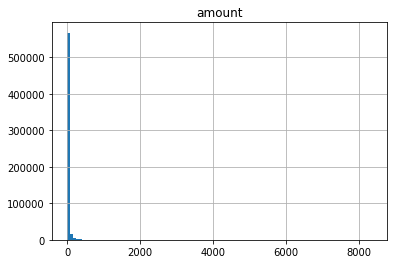

In [13]:
# spread of amount
import matplotlib
df.amount.describe()
df.hist(column = 'amount', bins=100)

<AxesSubplot:ylabel='Density'>

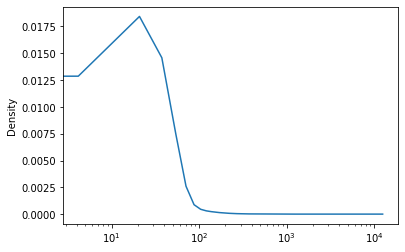

In [14]:
df['amount'].plot.density(logx=True)

In [15]:
# spread of amount past 1000 pounds#
# df[df.amount > 1000].hist(column = 'amount', bins=100)

In [16]:
df.amount.describe()

count    594643.000000
mean         37.890135
std         111.402831
min           0.000000
25%          13.740000
50%          26.900000
75%          42.540000
max        8329.960000
Name: amount, dtype: float64

In [17]:
pd.cut(df.amount, 100)

0         (-8.33, 83.3]
1         (-8.33, 83.3]
2         (-8.33, 83.3]
3         (-8.33, 83.3]
4         (-8.33, 83.3]
              ...      
594638    (-8.33, 83.3]
594639    (-8.33, 83.3]
594640    (-8.33, 83.3]
594641    (-8.33, 83.3]
594642    (-8.33, 83.3]
Name: amount, Length: 594643, dtype: category
Categories (100, interval[float64, right]): [(-8.33, 83.3] < (83.3, 166.599] < (166.599, 249.899] < (249.899, 333.198] ... (7996.762, 8080.061] < (8080.061, 8163.361] < (8163.361, 8246.66] < (8246.66, 8329.96]]

In [18]:
#df[df.amount > 1000].amount.plot.box()

In [19]:
# average amount per customer 
df.groupby(['customer'])['amount'].mean()

customer
'C1000148617'     35.091908
'C100045114'      90.336239
'C1000699316'     38.154894
'C1001065306'    204.754667
'C1002658784'     34.253282
                    ...    
'C99729647'       32.555771
'C998690782'      61.211637
'C998987490'      32.273107
'C999393223'      36.018944
'C999723254'      29.184016
Name: amount, Length: 4112, dtype: float64

In [20]:
# average amount per merchant
df.groupby(['merchant'])['amount'].mean()

merchant
'M1053599405'     103.072322
'M117188757'      105.102381
'M1198415165'      94.622911
'M1294758098'     289.667120
'M1313686961'      44.593586
'M1352454843'     109.981324
'M1353266412'     377.828462
'M1400236507'     116.117758
'M1416436880'      91.267818
'M151143676'       43.461014
'M1535107174'      74.734347
'M1600850729'      63.088700
'M1649169323'     123.378210
'M1726401631'     855.920000
'M17379832'       250.377270
'M1741626453'     173.341742
'M1748431652'      76.526022
'M1788569036'      94.689779
'M1823072687'      26.953146
'M1842530320'      99.586671
'M1872033263'     114.769143
'M1873032707'     376.237320
'M1888755466'     135.881524
'M1913465890'     104.441660
'M1946091778'      57.067848
'M2011752106'     323.581270
'M2080407379'    2299.512292
'M209847108'       62.391623
'M2122776122'     322.579824
'M348875670'      120.740467
'M348934600'       26.965542
'M349281107'       61.932704
'M3697346'        288.442597
'M45060432'       103.027016
'M480

In [21]:
# number of transactions per customer
df.customer.value_counts()

'C1978250683'    265
'C1275518867'    252
'C806399525'     237
'C515668508'     205
'C1338396147'    195
                ... 
'C1345586046'      6
'C1156745710'      6
'C1404665203'      5
'C1743702978'      5
'C1809646275'      5
Name: customer, Length: 4112, dtype: int64

In [22]:
# number of transactions per merchant 
df.merchant.value_counts()


'M1823072687'    299693
'M348934600'     205426
'M85975013'       26254
'M1053599405'      6821
'M151143676'       6373
'M855959430'       6098
'M1946091778'      5343
'M1913465890'      3988
'M209847108'       3814
'M480139044'       3508
'M349281107'       2881
'M1600850729'      2624
'M1535107174'      1868
'M980657600'       1769
'M78078399'        1608
'M1198415165'      1580
'M840466850'       1399
'M1649169323'      1173
'M547558035'        949
'M50039827'         916
'M1888755466'       912
'M692898500'        900
'M1400236507'       776
'M1842530320'       751
'M732195782'        608
'M97925176'         599
'M45060432'         573
'M1741626453'       528
'M1313686961'       527
'M1872033263'       525
'M1352454843'       370
'M677738360'        358
'M2122776122'       341
'M923029380'        323
'M3697346'          308
'M17379832'         282
'M1748431652'       274
'M1873032707'       250
'M2011752106'       244
'M1416436880'       220
'M1294758098'       191
'M1788569036'   

In [23]:
# IQR
Q1 = df.amount.quantile(0.25)
Q3 = df.amount.quantile(0.75)
IQR = Q3 - Q1
print("Interquartile Range for amount: " )
IQR

# Outliers 

Maximum = Q3 + (1.5 * IQR)
print("Maximum outliers for amount: ")
Maximum

Interquartile Range for amount: 


28.799999999999997

Maximum outliers for amount: 


85.74

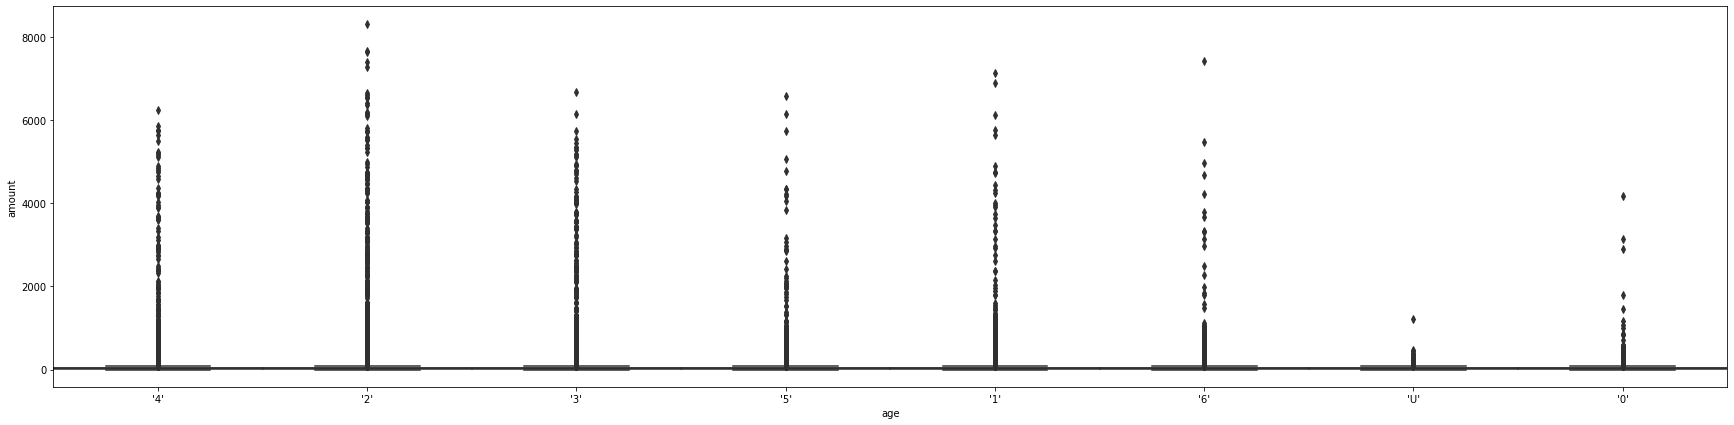

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig_dims = (30, 7)
fig, ax = plt.subplots(figsize = fig_dims)
bplot=sns.boxplot(data = df, y='amount', x='age', ax= ax, 
                 width=1,
                 palette="colorblind"
                 )

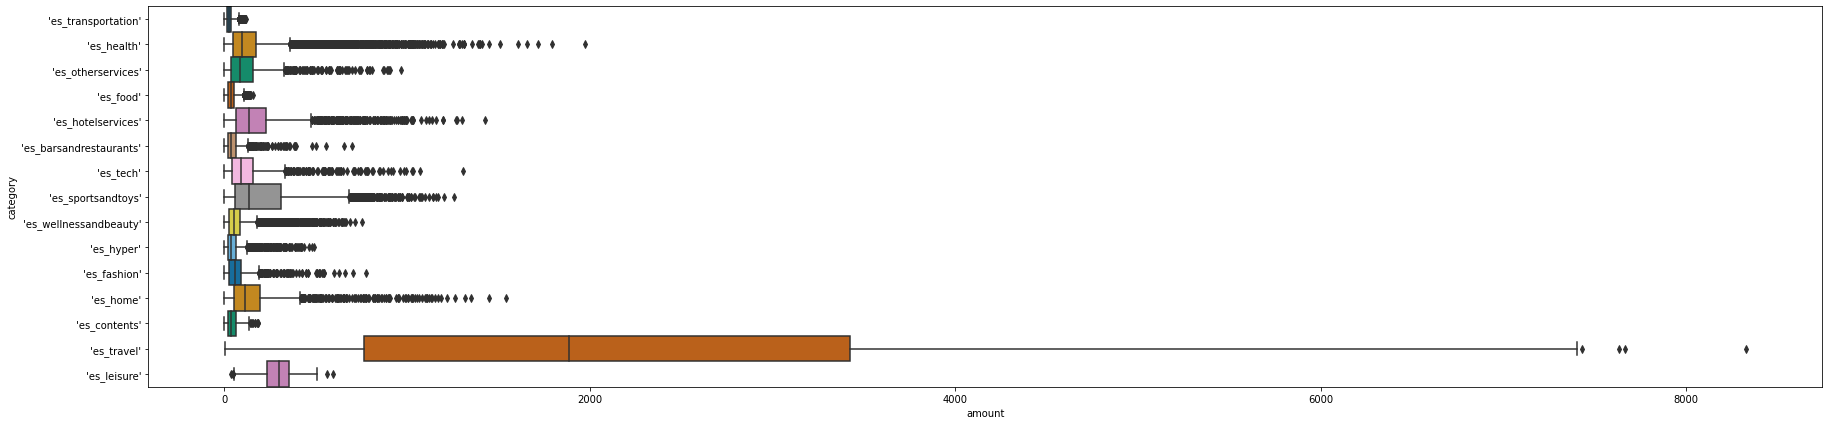

In [25]:
# boxplot of categories and amount
fig_dims = (30, 7)
fig, ax = plt.subplots(figsize = fig_dims)
bplot=sns.boxplot(data = df, y='category', x='amount', ax= ax,
                 width=1,
                 palette="colorblind",
                 )

Text(0.5, 0, 'gender')

Text(0, 0.5, 'transaction category')

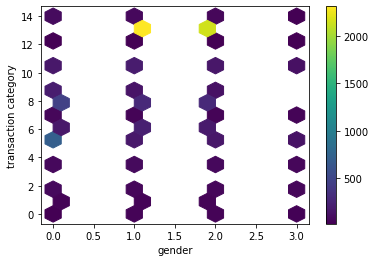

In [26]:
from sklearn.preprocessing import LabelEncoder
cols = ['age', 'gender', 'category']
lb_make = LabelEncoder()
for col in cols:
    df[col + "_code"] = lb_make.fit_transform(df[col])
      
ax = df.plot.hexbin(x= 'gender_code', 
                    y= 'category_code', 
                    C = 'amount', 
                    gridsize = 15,
                    cmap = "viridis",
                    sharex=False)

plt.xlabel('gender')
plt.ylabel('transaction category')

Text(0.5, 0, 'age')

Text(0, 0.5, 'transaction category')

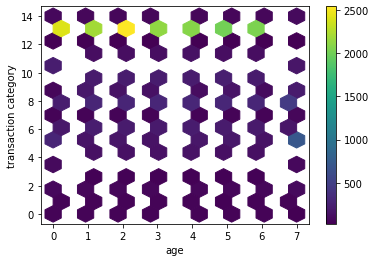

In [27]:
ax = df.plot.hexbin(x= 'age_code', 
                    y= 'category_code', 
                    C = 'amount', 
                    gridsize = 15,
                    cmap = "viridis",
                    sharex=False)
plt.xlabel('age')
plt.ylabel('transaction category')

<AxesSubplot:xlabel='age', ylabel='category'>

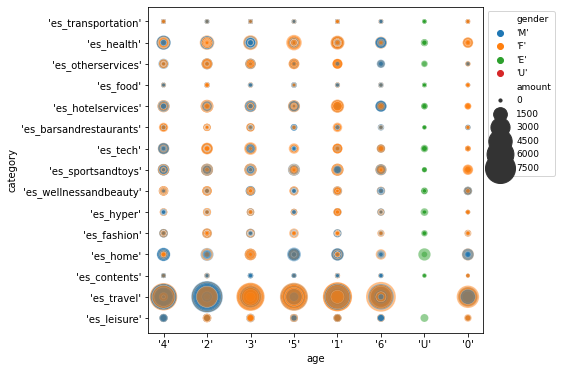

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("data/bs.csv")

data = df
fig_dims = (6, 6)
fig, ax = plt.subplots(figsize = fig_dims)
sns.scatterplot(data=data, x = 'age', y = 'category', size='amount', hue='gender',alpha= 0.5, sizes=(10,1000), ax = ax)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)


Text(0, 0.5, 'Transactions')

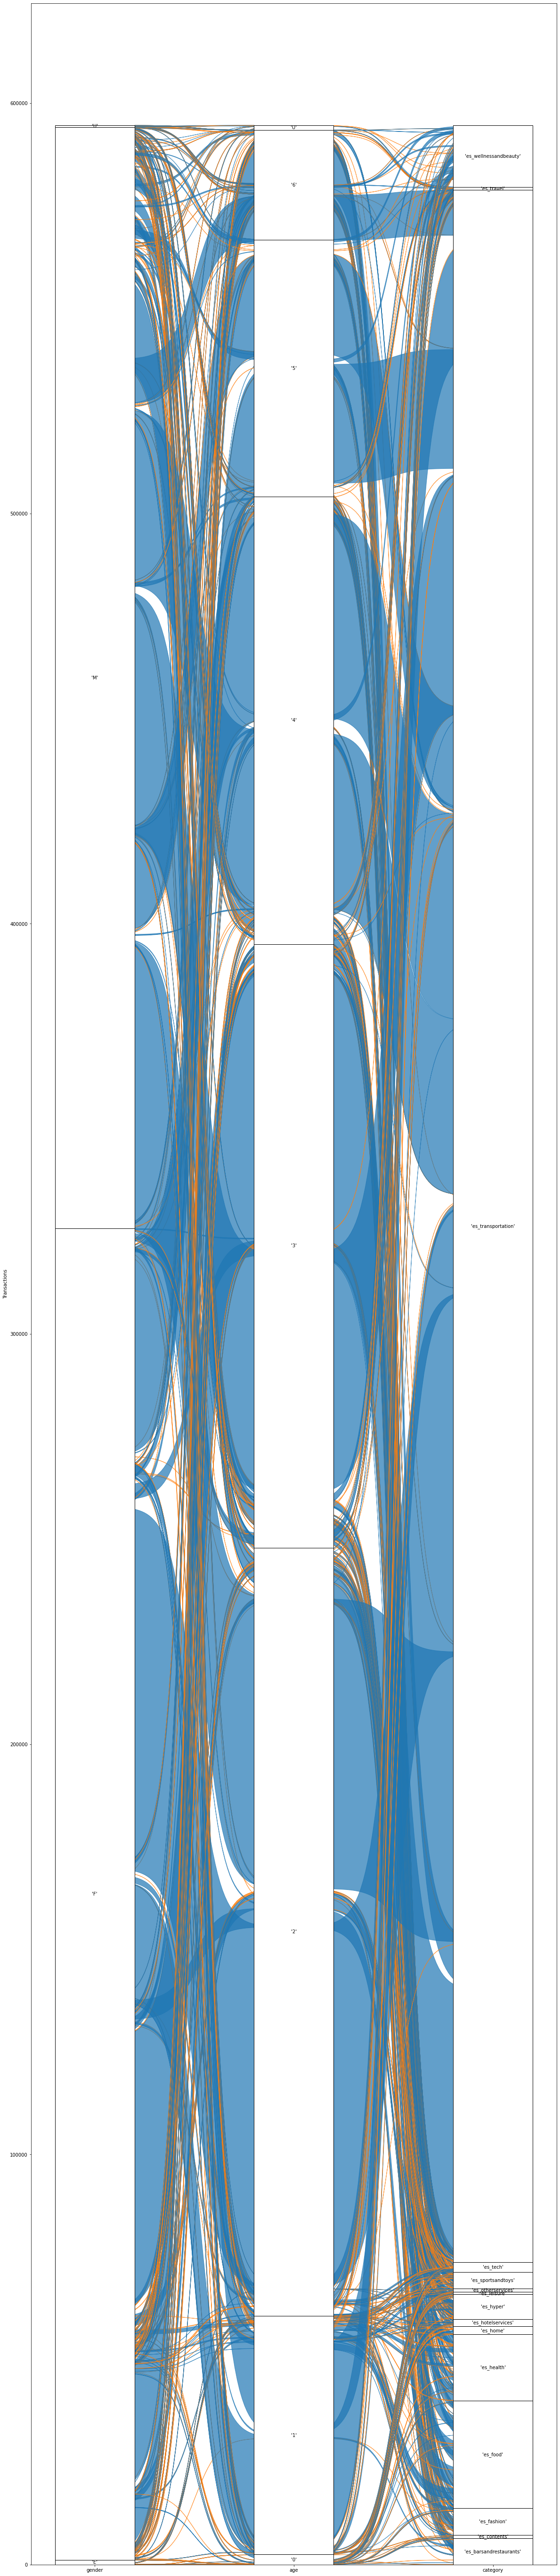

In [29]:
import pyalluvial.alluvial as alluvial 

freq_df = pd.read_csv("alluvial.csv")
fig = alluvial.plot(df=freq_df, xaxis_names=['gender','age', 'category'], y_name='count', alluvium='fraud', ignore_continuity=False, figsize=(20, 100))
plt.ylabel('Transactions')